In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
df = pd.read_excel('1975 data.xlsx', index_col=0, parse_dates=True)
df.head()

,mi,exr,inf,mpr,fb,brent,wtexs,bonny,mii,ex,brt,wti,bon
Year,,,,,,,,,,,,,
1975-01-01,0.339213,0.6267,36.101335,4.0,-0.074729,13.95,11.160000,12.85,0.292082,-0.467287,2.635480,2.412336,2.553344
1976-01-01,0.384192,0.6308,11.441035,3.5,-0.149471,12.80,12.645000,14.33,0.325116,-0.460766,2.549445,2.537262,2.662355
1977-01-01,0.388284,0.6514,27.211756,4.0,-0.092725,13.90,14.295833,14.33,0.328068,-0.428631,2.631889,2.659968,2.662355
1978-01-01,0.391081,0.6475,5.993234,5.0,-0.081888,14.00,14.850000,14.80,0.330081,-0.434636,2.639057,2.698000,2.694627
1979-01-01,0.388424,0.5605,7.982960,5.0,0.387515,23.26,22.404167,29.97,0.328170,-0.578926,3.146735,3.109247,3.400197


In [3]:
df.rename(columns={'mpr': 'ir'}, inplace=True)

In [4]:
df = df[['mi', 'brt', 'fb', 'ex', 'inf', 'ir']]

In [5]:
from nardl import NARDL as nd

In [6]:
# Initialize and fit the NARDL model
model = nd(
    data=df,
    dep='mi',
    asym_vars=['brt'],
    trend='ct',
    max_lag_endog=3,
    per_exog_lags=True,
    ic='aic',
    cov_type='HAC'
)

model.fit()

In [7]:
# Get ECM/short-run summary
ecm = model.ecm_summary()
ecm

,coef,std_err,t,p
term,,,,
const,0.447066,0.111730,4.001293,6.299733e-05
trend,-0.054563,0.014001,-3.897108,9.734806e-05
ECT(-1),-0.988816,0.069735,-14.179528,1.226693e-45
Δy_lag1,0.215181,0.034951,6.156728,7.426309e-10
Δbrt_pos_lag0,-0.017976,0.125085,-0.143713,8.857269e-01
Δbrt_pos_lag1,0.497231,0.132962,3.739634,1.842885e-04
Δbrt_pos_lag2,-0.111392,0.060726,-1.834335,6.660423e-02
Δbrt_neg_lag0,-0.396642,0.158466,-2.503010,1.231421e-02
Δbrt_neg_lag1,0.282485,0.130328,2.167488,3.019763e-02


In [8]:
# Get long-run summary
lr = model.longrun_summary()
lr

,coef,std_err,z,p
term,,,,
longrun_const,0.452122,0.096494,4.685493,2.792868e-06
longrun_trend,-0.055180,0.012888,-4.281505,1.856337e-05
brt (pos),0.260819,0.064311,4.055565,5.001337e-05
brt (neg),-0.323573,0.193884,-1.668903,9.513656e-02
fb,0.033139,0.165990,0.199647,8.417564e-01
ex,-0.117371,0.067087,-1.749537,8.019832e-02
inf,-0.007930,0.001354,-5.856527,4.726481e-09
ir,0.028358,0.006479,4.377091,1.202735e-05


In [9]:
# Bounds test
bt = model.bounds_test(case="IV")
bt

,case,F-stat,df_num,df_den,k_levels,I0@0.05,I1@0.05,decision@0.05
0,IV,43.895807,8,15.0,6,NaN,NaN,CV unavailable


In [10]:
# Bootstraped bounds with intervals
bb  = model.bounds_bootstrap(B=999, case="IV")
bb

,case,F-stat,p_boot,q90,q95,q99,decision@5%
0,IV,43.895807,0.014,23.792772,31.366138,50.22276,cointegration


In [11]:
asy = model.asymmetry_tests()
asy

,variable,test,wald_stat,p_value
0,brt,long_run,9.554397,0.001995
1,brt,short_run,3.338021,0.067696


In [12]:
diag = model.diagnostics()
diag

,BG_lags,BG_LM,BG_p,ARCH_lags,ARCH_LM,ARCH_p,R2,Adj_R2
0,2,7.543413,0.023013,4,1.83812,0.765501,0.836385,0.541878


In [13]:
model.export_all("nardl_results.xlsx", horizon=36, B=499, case="IV")

WindowsPath('nardl_results.xlsx')

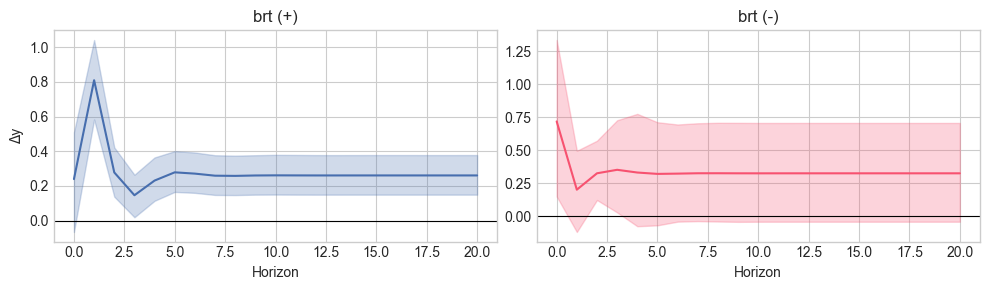

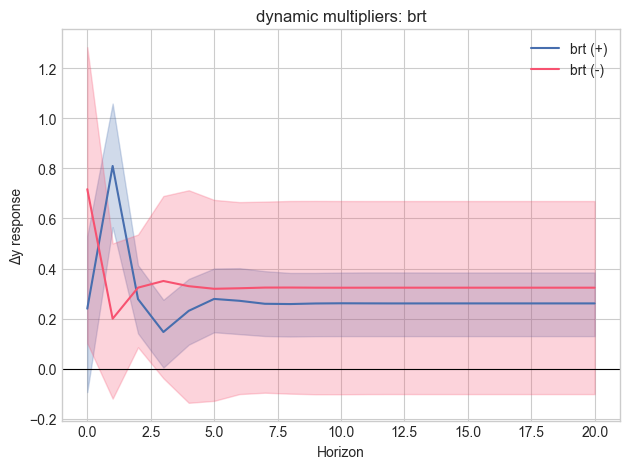

In [14]:
model.plot_all_multipliers(horizon=20, bands=True, nboot=499, level=0.95)
model.plot_dynamic_multiplier("brt", 20)